# Metoda gradientów sprzężonych

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Implementacja

In [172]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def mgs(x0, A, b, iter):
    r = b - A @ x0
    p = r
    for i in range(iter):
        Ap = A @ p
        L = (r.T @ r) / (p.T @ Ap)
        x0 = x0 + L * p
        r_new = r - L * Ap
        B = (r_new.T @ r_new) / (r.T @ r)
        if np.all(p == 0):
            break
        p = r_new + B * p
        r = r_new
    return x0

## Wywołanie

In [181]:
A = np.array([[4, 2, -1],
              [2, 5, 2],
              [-1, 2, 10]])
b = np.array([12, -8, 4])
x0 = np.zeros_like(b)

x = mgs(x0, A, b, 3)
print("Rozwiązanie:", x)
print("Porównanie funkcją wbudowaną:", np.linalg.solve(A, b))

Rozwiązanie: [ 5.83206107 -4.70229008  1.92366412]
Porównanie funkcją wbudowaną: [ 5.83206107 -4.70229008  1.92366412]


## Wykres

[ 5.90825688 -4.62385321  1.79816514]


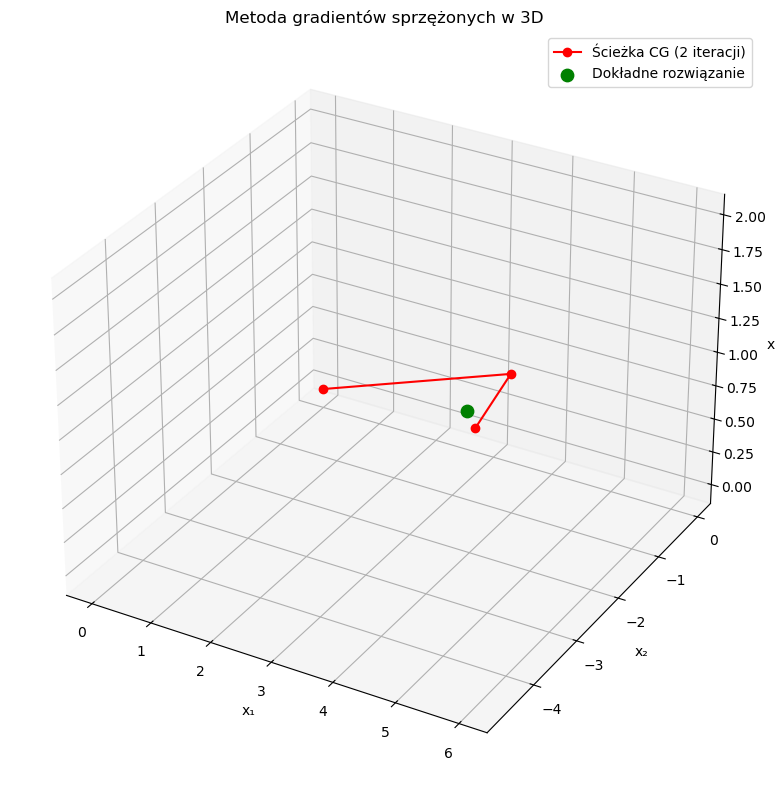

In [183]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def cg_with_trace(x0, A, b, max_iter=20):
    r = b - A @ x0
    p = r.copy()
    trace = [x0.copy()]
    for i in range(max_iter):
        Ap = A @ p
        alpha = (r.T @ r) / (p.T @ Ap)
        x0 = x0 + alpha * p
        r_new = r - alpha * Ap
        if np.all(p == 0):
            break
        beta = (r_new.T @ r_new) / (r.T @ r)
        p = r_new + beta * p
        r = r_new
        trace.append(x0.copy())
    return x0, np.array(trace)

# Dane wejściowe
A = np.array([[4, 2, -1],
              [2, 5, 2],
              [-1, 2, 10]])
b = np.array([12, -8, 4])
x0 = np.zeros(3)

# Rozwiązanie dokładne
sol_exact = np.linalg.solve(A, b)

# Ścieżka CG (tylko kilka iteracji)
max_iter=2
x, trace = cg_with_trace(x0, A, b, max_iter)
print(x)

# Tworzenie wykresu 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Trajektoria iteracji (czerwone punkty)
ax.plot(trace[:, 0], trace[:, 1], trace[:, 2], 'ro-', label=f"Ścieżka CG ({max_iter} iteracji)")

# Dokładne rozwiązanie (zielony punkt)
ax.scatter(sol_exact[0], sol_exact[1], sol_exact[2], color='green', s=80, label="Dokładne rozwiązanie")

# Oznaczenia osi
ax.set_xlabel('x₁')
ax.set_ylabel('x₂')
ax.set_zlabel('x₃')
ax.set_title("Metoda gradientów sprzężonych w 3D")
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()